## Sztuczne sieci neuronowe - laboratorium 11

In [1]:
!pip install matplotlib
!pip install albumentations


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Using cached scipy-1.15.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 15.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 14.1 MB/s eta 0:00:0000:0100:01
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.1/633.1 kB 9.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Data augmentation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import torch, torchvision
from torchvision import datasets, transforms

In [3]:
IMAGENET_MEANS = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

IMAGENET_IMG_SIZE = 224

DATA_PATH = pathlib.Path("data/hymenoptera_data")

In [4]:
training_transforms = transforms.Compose([
        transforms.RandomResizedCrop(IMAGENET_IMG_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(IMAGENET_MEANS, IMAGENET_STD)
    ])

In [5]:
validation_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(IMAGENET_IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEANS, IMAGENET_STD)
])

#### Ćwiczenie

Wczytaj trzykrotnie uczący zbiór danych z katalogu `common/data/hymenoptera_data`:
- `images_dataset` - jako obrazki `PIL.Image`
- `centered_dataset` - jako tensory po przejściu przez`validation_transforms`
- `augmented_dataset` - jako tensory po przejściu przez `training_transforms`

In [6]:
images_dataset = datasets.ImageFolder(
    DATA_PATH / "train",
    transform=None  # bez transformacji, czyli jako obrazki PIL.Image
)
centered_dataset = datasets.ImageFolder(
    DATA_PATH / "train",
    transform=validation_transforms  # z transformacją validation_transforms
)
augmented_dataset = datasets.ImageFolder(
    DATA_PATH / "train",
    transform=training_transforms  # z transformacją training_transforms
)

#### Ćwiczenie

Uzupełnij poniższą komórkę, aby wyświetlić obok siebie cztery obrazki ze zbioru `centered_dataset`. Użyj klasy `torch.utils.data.Dataloader` i podanej funkcji `show_tensor`.

In [7]:
def show_tensor(t: torch.Tensor, title=None):
    """Imshow for Tensor."""
    t = t.numpy().transpose((1, 2, 0))
    mean = np.array(IMAGENET_MEANS)
    std = np.array(IMAGENET_STD)
    t = std * t + mean
    t = np.clip(t, 0, 1)
    plt.imshow(t)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

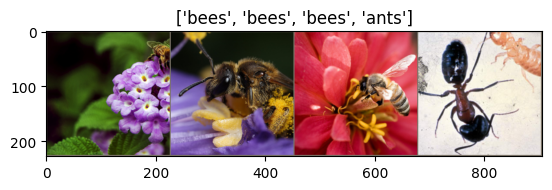

In [8]:
centered_dataloader = torch.utils.data.DataLoader(
    centered_dataset,
    batch_size=4,  # liczba obrazków do wyświetlenia
    shuffle=True,  # losowe pobieranie obrazków
    num_workers=0  # liczba wątków do ładowania danych
)
centered_inputs, classes = next(iter(centered_dataloader))

centered_grid = torchvision.utils.make_grid(centered_inputs)
show_tensor(centered_grid, title=[centered_dataset.classes[x] for x in classes])

#### Ćwiczenie

Powtórz powyższe ćwiczenie, tym razem dla zbioru `augmented_dataset`.

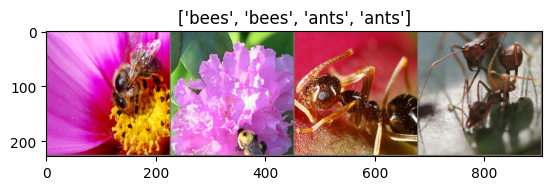

In [10]:
augmented_dataloader = torch.utils.data.DataLoader(
    augmented_dataset,
    batch_size=4,  # liczba obrazków do wyświetlenia
    shuffle=True,  # losowe pobieranie obrazków
    num_workers=0  # liczba wątków do ładowania danych
)
augmented_inputs, classes = next(iter(augmented_dataloader))

augmented_grid = torchvision.utils.make_grid(augmented_inputs)
show_tensor(augmented_grid, title=[augmented_dataset.classes[x] for x in classes])

#### Ćwiczenie

Listę transformacji (obiekt `Compose`) można także zaaplikować bezpośrednio do obrazka `PIL.Image` wywołując ją jak funkcję z argumentem `img`.

Przepuść wybrany obrazek (a potem sprawdź inne) przez `validation_transforms` i `training_transforms`. Zwizualizuj wynik.

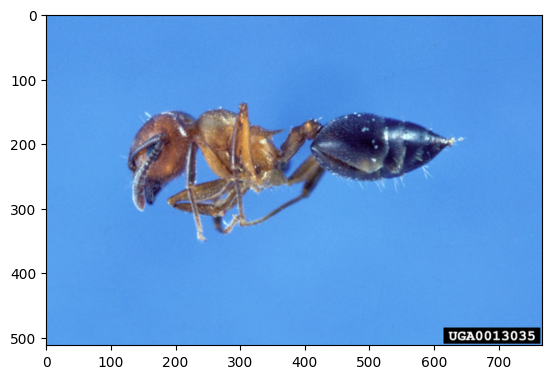

In [30]:
image = images_dataset[0][0]
plt.imshow(image)

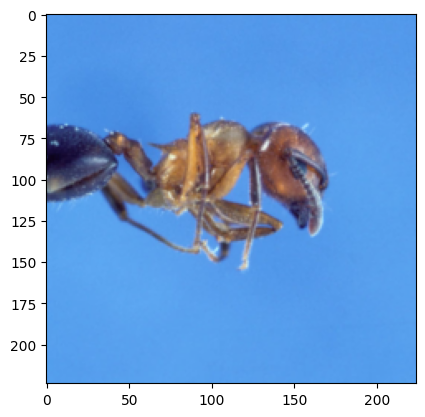

In [31]:
augmented_training_image = image.copy()
augmented_training_image = training_transforms(augmented_training_image)
show_tensor(augmented_training_image)

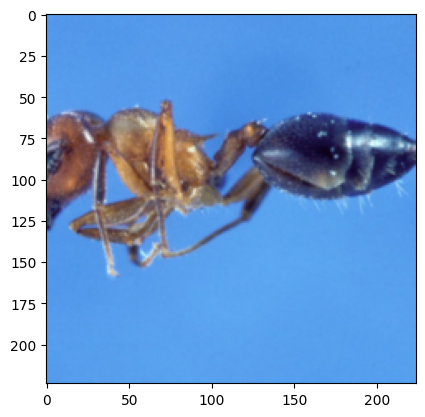

In [32]:
augmented_validation_image = image.copy()
augmented_validation_image = validation_transforms(augmented_validation_image)
show_tensor(augmented_validation_image)

#### Ćwiczenie

Wypróbuj różne augmentacje z https://pytorch.org/vision/stable/transforms.html i zwizualizuj ich wpływ na wybrany obrazek ze zbioru `images_dataset`.

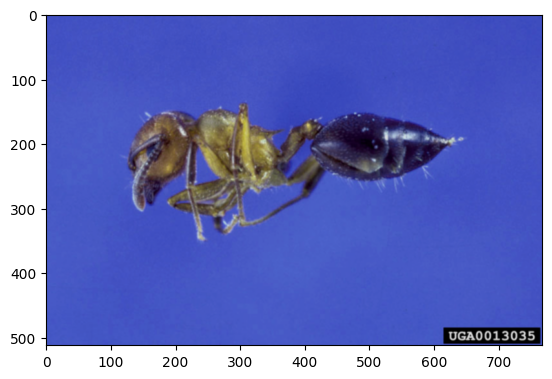

In [33]:
custom_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),
    transforms.GaussianBlur(kernel_size=5),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEANS, IMAGENET_STD)
])

transformed_example = image.copy()
transformed_example = custom_transforms(img=transformed_example)

show_tensor(transformed_example)

### Data augmentation - albumentations

- https://albumentations.ai/docs/examples/example
- https://albumentations.ai/docs/examples/migrating_from_torchvision_to_albumentations
- https://albumentations.ai/docs/examples/pytorch_classification

## Wnioski
Dzięki bibliotece albumentations jesteśmy w stanie tworzyć wydajne pipeline'y cyfrowego przetwarzania obrazów, które są niezwykle przydatne w uczeniu maszynowym, między innymi w problemach klasyfikacji.